# Mesh Smoothing and Optimization

## Improve geometric mesh quality

The function 

    [node,elem] = optmesh(node,elem)

will optimize the shape
regularity of triangles in the input mesh `(node,elem)` and outputs a
better mesh `(node,elem)`. Note that the connectivity, i.e., `elem` might be changed. Use 

    node = meshsmoothing(node,elem)
    
to move nodes only.

After showing an example, we shall explain algorithms implemented in `optmesh.m`.

 - Min quality 0.2456 - Mean quality 0.8953 
Mesh quality before optimization 
 - Min quality 0.2456 - Mean quality 0.8953 
Mesh quality after optimization 
 - Min quality 0.5756 - Mean quality 0.9356 
 - Min quality 0.5756 - Mean quality 0.9356 


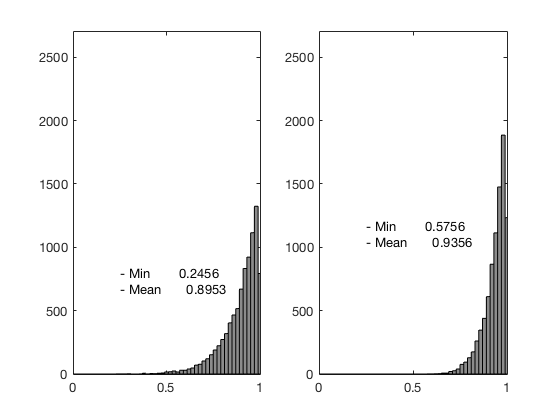

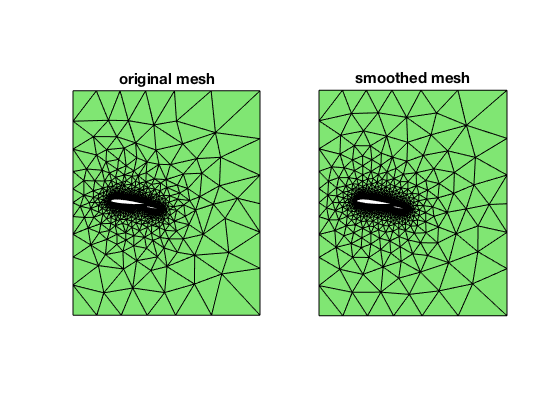

In [1]:
load airfoilperturbmesh
figure(1); subplot(1,2,1); 
showmesh(node,elem); title('original mesh');
figure(2); subplot(1,2,1); 
showmeshquality(node,elem); axis([0 1 0 2700]);
[node,elem] = optmesh(node,elem);
figure(1); subplot(1,2,2); 
showmesh(node,elem); title('smoothed mesh');
figure(2); subplot(1,2,2); 
showmeshquality(node,elem); axis([0 1 0 2700]);

## ODT-based mesh smoothing

In the function `meshsmoothing`, we move one node at a time inside its
patch, which consists of all triangles surrounding this node, such that
the interpolation error to the quadratic function $z=x^2+y^2$ is minimized. The function `meshsmoothing` will keep the topology of the input mesh, i.e., the node index and connectivity of nodes are unchanged.

In the simplest case, the scheme is to move the node to the average of
circumenters of triangles in the local patch. Details can be found in my research webpage [ODT mesh](http://math.uci.edu/~chenlong/mesh.html). 

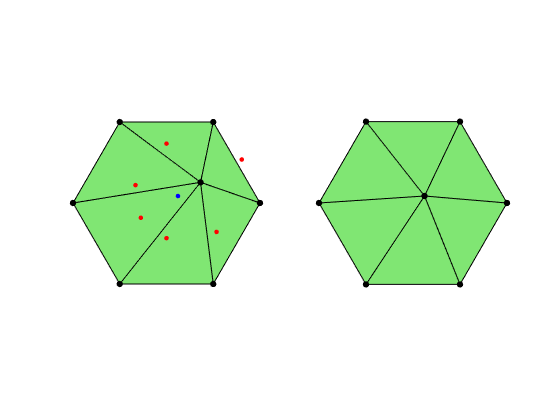

In [2]:
theta = [-2*pi/3 -pi/3 0 pi/3 2*pi/3 pi]';
node = [cos(theta), sin(theta)];
node(end+1,:) = 0;
elem = delaunayn(node);
node(end,:) = rand(1,2)*0.4;
figure(3); subplot(1,2,1);
showmesh(node,elem); findnode(node,'all','noindex');
c = circumcenter(node,elem);
hold on; plot(c(:,1),c(:,2),'r.','MarkerSize',16)
node(end,:) = mean(c);
plot(node(end,1),node(end,2),'b.','MarkerSize',16)
figure(3); subplot(1,2,2);
showmesh(node,elem); findnode(node,'all','noindex');

## Edge swapping

Edge swapping is used to further improve the mesh quality. `elem = edgeswap(node,elem)` swap diagonals of a convex quadlateral formed by two triangles of the mesh (node,elem) such that the summation
of opposite angles are less than or equal to 180 degree, i.e., it is locally Delaunay.

Since the connectivity may be changed, some elementwise quantity, e.g.,
the material property, if any, should be updated accordingly.

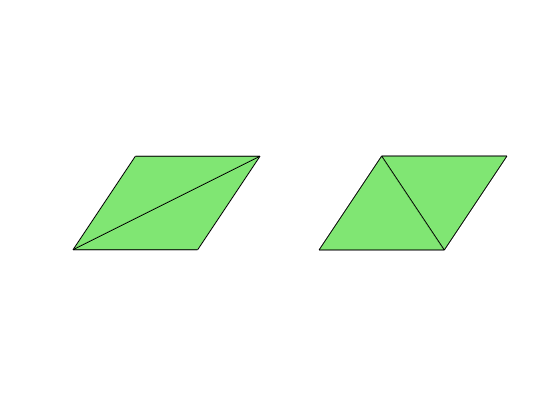

In [4]:
node = [0,0; 1,0; 0.5, 0.75; 1.5, 0.75];
elem = [1 2 4; 4 3 1];
subplot(1,2,1); showmesh(node,elem);
elem = edgeswap(node,elem);
subplot(1,2,2); showmesh(node,elem);